In [19]:
#1. import data
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head()
price = data.loc[:,'价格']
age = data.loc[:,'平均房龄']
area = data.loc[:,'面积']
income = data.loc[:,'人均收入']

Text(0.5, 1.0, 'age vs price')

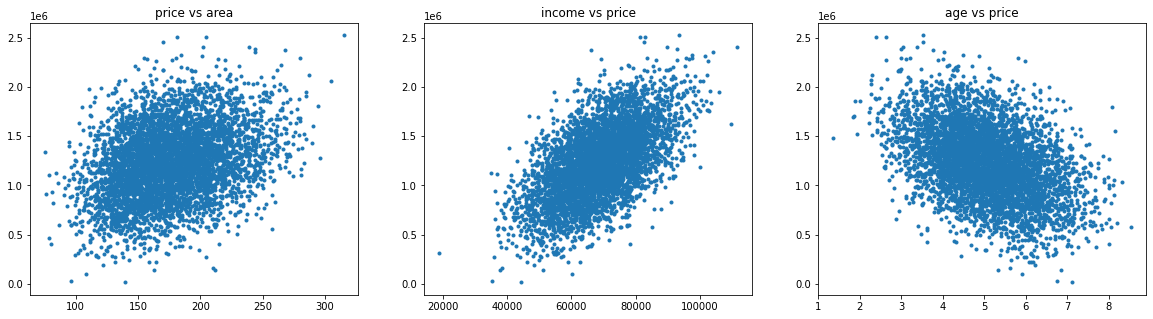

In [20]:
#2.visualise data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,5))#size
#subplot
fig1 = plt.subplot(1,3,1)#1 raw, 3 column# , first
plt.plot(area,price,'.')
plt.title('price vs area')

fig2 = plt.subplot(1,3,2)
plt.plot(income,price,'.')
plt.title('income vs price')

fig3 = plt.subplot(1,3,3)
plt.plot(age,price,'.')
plt.title('age vs price')

1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果


In [21]:
#1.reshape data
#change the type of data, then make it in format m,1
price = np.array(price)
area = np.array(area)
price = price.reshape(-1,1)
area = area.reshape(-1,1)

In [22]:
#2.build a model and train it
from sklearn.linear_model import LinearRegression
#New instance
model = LinearRegression()
model.fit(area,price)

LinearRegression()

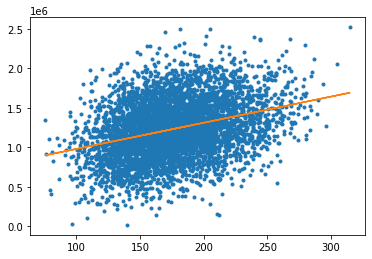

In [23]:
# 3. prediction
price_pre = model.predict(area)
plt.plot(area,price,'.')
plt.plot(area,price_pre)

Text(0, 0.5, 'prediction')

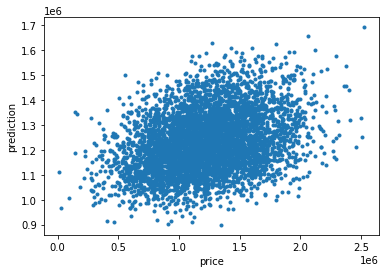

In [24]:
#4. visualization
plt.plot(price,price_pre,'.')
plt.xlabel('price')
plt.ylabel('prediction')

In [25]:
#5.performance of the model

#模型评估
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
MSE = mean_squared_error(price,price_pre)

R2 = r2_score(price,price_pre)

print('MSE = %f , R2 = %f'%(MSE,R2))

MSE = 116859388203.273346 , R2 = 0.107663


2、以面积、人均收入、平均房龄为输入变量，建立多因子模型，评估模型表现


In [27]:
#get all variables(remove price)
varis = data.drop(['价格'],axis=1)
varis.head()

,面积,人均收入,平均房龄
0,188.581619,79245.63626,4.901877
1,164.161571,78936.74809,4.688919
2,232.949602,63236.99563,4.878289
3,150.608655,65122.34212,3.577503
4,153.862555,63628.64511,5.877775


In [28]:
varis = np.array(varis)
model2 = LinearRegression()
model2.fit(varis,price)

LinearRegression()

In [29]:
price_pre_2 = model2.predict(varis)
print(price_pre_2)

[[1463868.24688829]
 [1445981.85185019]
 [1253388.6205439 ]
 ...
 [1285670.68139457]
 [1243839.71867445]
 [1116875.92416746]]


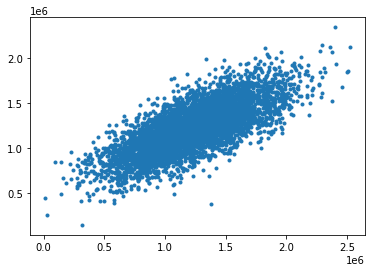

In [30]:
plt.plot(price,price_pre_2,'.')

In [31]:
MSE_2 = mean_squared_error(price,price_pre_2)

R2_2 = r2_score(price,price_pre_2)

print('MSE = %f , R2 = %f'%(MSE_2,R2_2))

MSE = 58264450329.883003 , R2 = 0.555093


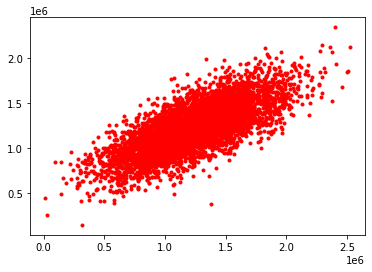

In [32]:
#compare 2 model

plt.plot(price,price_pre_2,'.r')



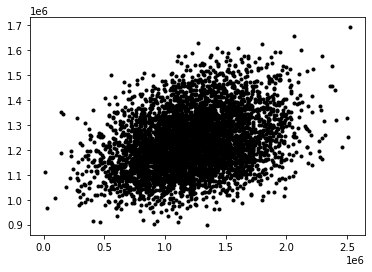

In [33]:
plt.plot(price,price_pre,'.k')


注意：
还是要依靠数据MSE，R2来评估模型，这两个模型看起来区别很大只是因为坐标值不同，真正的放在一个图上人为是分辨不出来精确度的，
所以即使要比较也要确保xlim，ylim的一致性



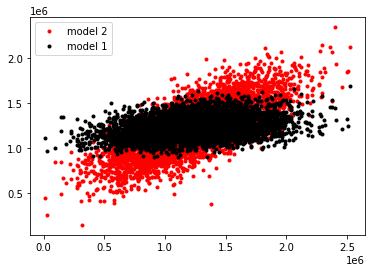

In [34]:
plt.plot(price,price_pre_2,'.r',label='model 2')
plt.plot(price,price_pre,'.k',label='model 1')
plt.legend()

In [36]:
MSE/MSE_2

2.0056721987701964

In [41]:
variable_test = np.array([[160,70000,5]])
price_pre_3 = model2.predict(variable_test)
print('price : ',price_pre_3)

price :  [[1235099.47156076]]
